# Atmospheric Water Deficit

In environmental sciences many times we are concerned with soil water deficits that can affect vegetation growth and limit root growth, above ground biomass accumulation, and grain yield. Estimating soil water deficits can be hard, even if we use a model. A more simplistic approach consists of using observations of precipitation and potential evapotrasnpiration observations to approximate the state of the soil mositure conditions. Of course, this is just a metric based on atmopsheric variables, but both precipitation and potential evapotranspiration are strongly linked to soil moisture dynamics and in some cases might be enough for practical hydrological applications and climate characterization.


In [70]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt


In [71]:
# Load data for Hollis, OK as in Figure
data = pd.read_csv('../datasets/hollis_ok_precip_et.csv')
data.head()


,date,doy,precip,et
0,2/28/1997,59,0.0,1.57
1,3/1/1997,60,0.0,2.24
2,3/2/1997,61,0.0,2.01
3,3/3/1997,62,0.0,4.34
4,3/4/1997,63,0.0,3.20


Before we proceed, let's convert the dates from `string` format to `datetime` format. This will allow us to easily generate plots involving dates with Matplotlib and it will also allow us to compute the day of the year.

In [72]:
# Let's prove that the current format is string
type(data["date"][0])

# Convert to datetime using Pandas
data.date = pd.to_datetime(data["date"])

# Let's prove that the new format is indeed in datetime format
type(data["date"][0])


pandas._libs.tslibs.timestamps.Timestamp

The next step constits of computing the cumulative sum of precipitation and evapotranspiration. In this case we will match the window of 15 days used in the reference manuscript by Torres et al., 2013.

We will set a `window of 7 days` and we will not make any computation for the first 15 values of the time series. this will prevent that we compute extremely low values of atmospheric water deficit due to lack of observations in the window. In other word, we will start computing the 15-day rolling sum after day number 15 (full window with data).

In [80]:
# Compute cumulative precipitation
window = 7 # days
data["precip_cum"] = data["precip"].rolling(window).sum()

# Compute cumulative evapotranspiration
data["et_cum"] = data["et"].rolling(window).sum()
data.head(10)


,date,doy,precip,et,precip_cum,et_cum,awd
0,1997-02-28,59,0.0,1.57,NaN,NaN,NaN
1,1997-03-01,60,0.0,2.24,NaN,NaN,NaN
2,1997-03-02,61,0.0,2.01,NaN,NaN,NaN
3,1997-03-03,62,0.0,4.34,NaN,NaN,NaN
4,1997-03-04,63,0.0,3.20,NaN,NaN,NaN
5,1997-03-05,64,0.0,3.96,NaN,NaN,NaN
6,1997-03-06,65,0.0,3.80,0.0,21.12,NaN
7,1997-03-07,66,0.0,4.23,0.0,23.78,NaN
8,1997-03-08,67,0.0,0.91,0.0,22.45,NaN
9,1997-03-09,68,0.0,4.27,0.0,24.71,NaN


In [81]:
# Compute atmospheric water deficit
data["awd"] = data["et_cum"] - data["precip_cum"]


In [82]:
# Compute the day of the year for each date
data["doy"] = data["date"].dt.dayofyear
data.head()

,date,doy,precip,et,precip_cum,et_cum,awd
0,1997-02-28,59,0.0,1.57,NaN,NaN,NaN
1,1997-03-01,60,0.0,2.24,NaN,NaN,NaN
2,1997-03-02,61,0.0,2.01,NaN,NaN,NaN
3,1997-03-03,62,0.0,4.34,NaN,NaN,NaN
4,1997-03-04,63,0.0,3.20,NaN,NaN,NaN


In [83]:
# We do this simplify the following statements
grouped_awd_data = data["awd"].groupby(data["doy"]) # This is an object

# Compute median
mean_awd = grouped_awd_data.mean()

# Get groups (which are the unique days of the year)
doy_awd = list(grouped_awd_data.groups.keys())


In [84]:
# Pitfall 1: Convert dictionary keys into list using square brackets
doy_awd_pitfall_1 = [ grouped_awd_data.groups.keys() ] 

# Print the variable to see the nesting of the keys: [dict_keys([1, 2, 3, 4, 5,


In [85]:
# Pitfall 2: Get unique day of the year
doy_awd_pitfall_2 = data["doy"].unique()

# Show first few elements to illustrate the difference between the two appraoches
print('Aligned with grouped AWD data:',doy_awd[0:10])
print('Not aligned with grouped AWD data:',doy_awd_pitfall_2[0:10])

Aligned with grouped AWD data: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Not aligned with grouped AWD data: [59 60 61 62 63 64 65 66 67 68]


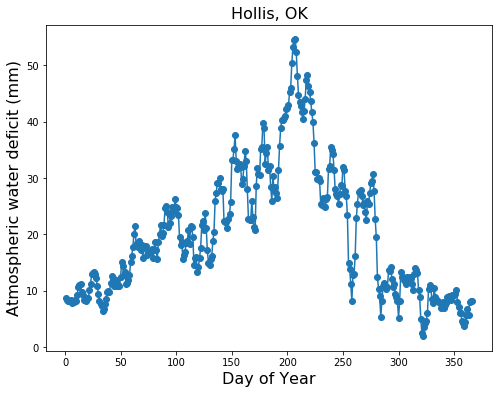

In [132]:
# Plot current variables
plt.figure(figsize=(8,6))
plt.title("Hollis, OK", size=16)
plt.plot(doy_awd, mean_awd, '-o')
plt.xlabel('Day of Year', size=16)
plt.ylabel('Atmospheric water deficit (mm)', size=16)
plt.show()


In [127]:
# Calculate probability of AWD > 50 mm
drought_threshold = 50
idx = data["awd"] > drought_threshold
awd_prob_50mm = idx.groupby(data["doy"]).sum() / grouped_awd_data.size()


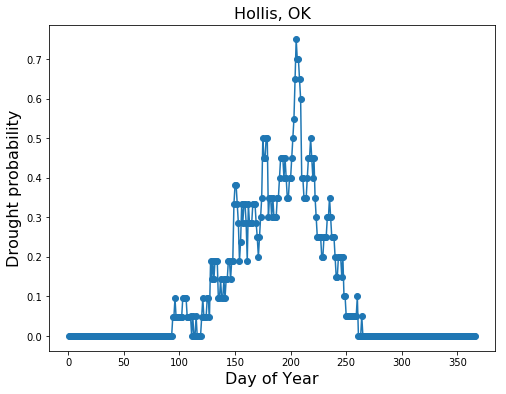

In [131]:
# Plot probability chart
plt.figure(figsize=(8,6))
plt.title("Hollis, OK", size=16)
plt.plot(doy_awd, awd_prob_50mm, '-o')
plt.xlabel('Day of Year', size=16)
plt.ylabel('Drought probability', size=16)
plt.show()


## References

Torres, G.M., Lollato, R.P. and Ochsner, T.E., 2013. Comparison of drought probability assessments based on atmospheric water deficit and soil water deficit. Agronomy Journal, 105(2), pp.428-436.